In [1]:
# Funções
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def wsilu(x, alpha=1.0):
    return x * sigmoid(alpha * x)

def derivative_wsilu(x, alpha=1.0):
    # Derivada: d/dx [x * sigmoid(alpha*x)]
    s = sigmoid(alpha * x)
    return s + alpha * x * s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def linear(x):
    return x

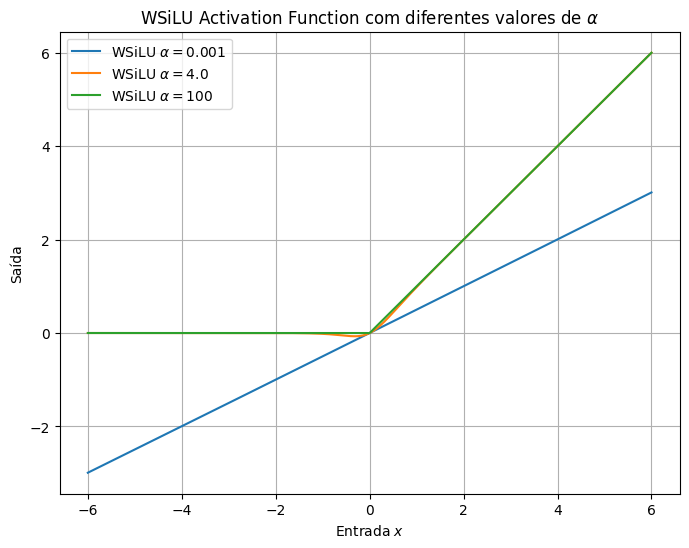

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Intervalo de valores para x
x = np.linspace(-6, 6, 400)

# Diferentes valores de alpha para o WSiLU
alphas = [0.001, 4.0, 100]

plt.figure(figsize=(8, 6))
for alpha in alphas:
    plt.plot(x, wsilu(x, alpha), label=fr'WSiLU $\alpha={alpha}$')

# Adiciona ReLU e função linear como referência
# plt.plot(x, np.maximum(0, x), 'k--', label='ReLU')
# plt.plot(x, x, 'k:', label='Linear')

plt.title("WSiLU Activation Function com diferentes valores de $\\alpha$")
plt.xlabel("Entrada $x$")
plt.ylabel("Saída")
plt.legend()
plt.grid(True)
plt.show()


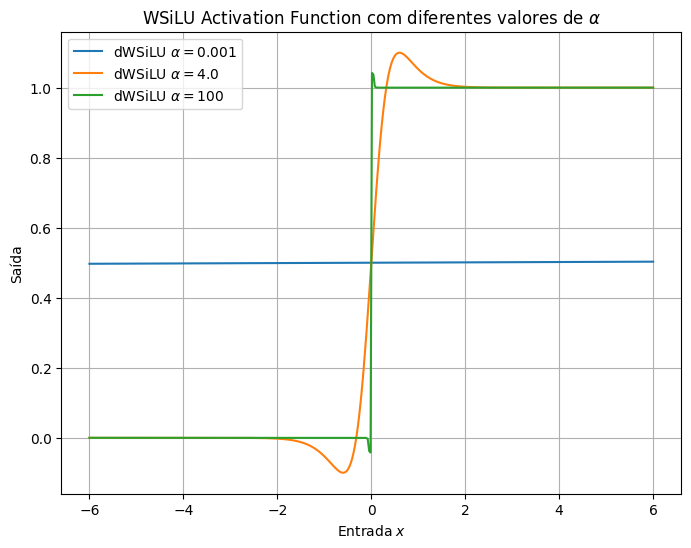

In [3]:
import numpy as np
import matplotlib.pyplot as plt




# Intervalo de valores para x
x = np.linspace(-6, 6, 400)

# Diferentes valores de alpha para o WSiLU
alphas = [0.001, 4.0, 100]

plt.figure(figsize=(8, 6))
for alpha in alphas:
    plt.plot(x, derivative_wsilu(x, alpha), label=fr'dWSiLU $\alpha={alpha}$')

# Adiciona ReLU e função linear como referência
# plt.plot(x, np.maximum(0, x), 'k--', label='ReLU')
# plt.plot(x, x, 'k:', label='Linear')

plt.title("WSiLU Activation Function com diferentes valores de $\\alpha$")
plt.xlabel("Entrada $x$")
plt.ylabel("Saída")
plt.legend()
plt.grid(True)
plt.show()


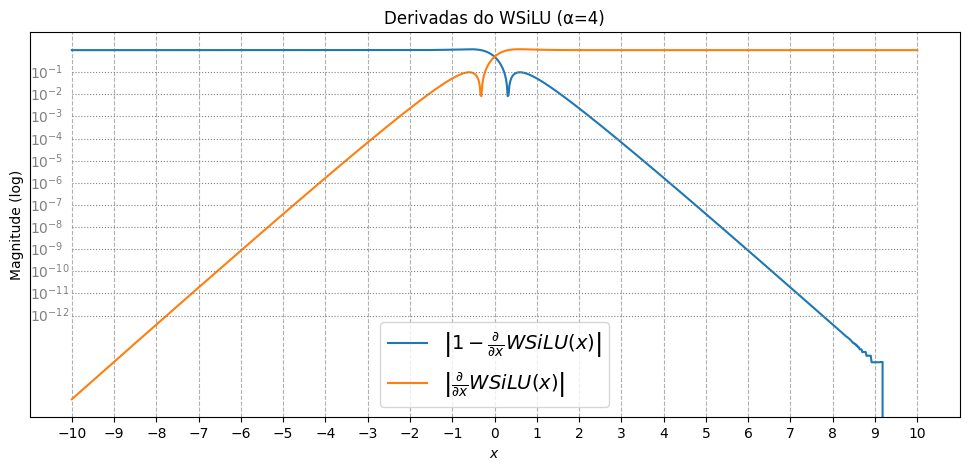

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator



# Parâmetros
alphas = [4.0]
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12, 5))

for alpha in alphas:
    plt.plot(x, abs(1 - derivative_wsilu(x, alpha)),
             label='$\\left| 1 - \\frac{\\partial}{\\partial x}WSiLU(x) \\right|$')
    plt.plot(x, abs(derivative_wsilu(x, alpha)),
             label='$\\left| \\frac{\\partial}{\\partial x}WSiLU(x) \\right|$')

# Configurações dos eixos
plt.yscale('log')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=10))
plt.xticks(np.arange(-10, 11, 1))

# Linhas horizontais em 10^-1, 10^-2, ..., 10^-6 com rótulos
y_lines = [10**(-i) for i in range(1, 13)]
for y in y_lines:
    plt.hlines(y, -10, 10, colors='gray', linestyles='dotted', linewidth=0.8)
    plt.text(10.2-21.2, y, f"$10^{{-{int(np.log10(1/y))}}}$",
             va='center', fontsize=10, color='gray')

plt.legend(fontsize=14)
plt.grid(True, which="both", ls="--")
plt.xlabel("$x$")
plt.ylabel("Magnitude (log)")
plt.title("Derivadas do WSiLU (α=4)")
plt.show()


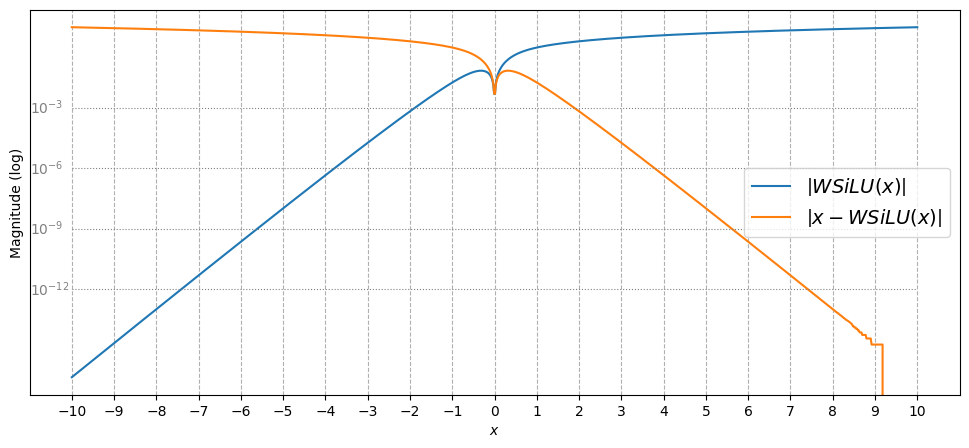

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator


# Parâmetros
alphas = [4.0]
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12, 5))
for alpha in alphas:
    plt.plot(x, abs(wsilu(x, alpha)),
             label='$\\left| WSiLU(x) \\right|$')
    plt.plot(x, abs(x - wsilu(x, alpha)),
             label='$\\left| x - WSiLU(x) \\right|$')

# Configurações dos eixos
plt.yscale('log')
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=10))
plt.xticks(np.arange(-10, 11, 1))

# Linhas horizontais em 10^-1, 10^-2, ..., 10^-6 com rótulos
y_lines = [10**(-i) for i in range(3, 13, 3)]
for y in y_lines:
    plt.hlines(y, -10, 10, colors='gray', linestyles='dotted', linewidth=0.8)
    plt.text(10.2-21.2, y, f"$10^{{-{int(np.log10(1/y))}}}$",
             va='center', fontsize=10, color='gray')

plt.legend(fontsize=14)
plt.grid(True, which="both", ls="--")
plt.xlabel("$x$")
plt.ylabel("Magnitude (log)")
# plt.title("Derivadas do WSiLU (α=4)")
plt.show()


/tmp/ipykernel_29248/594615332.py:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


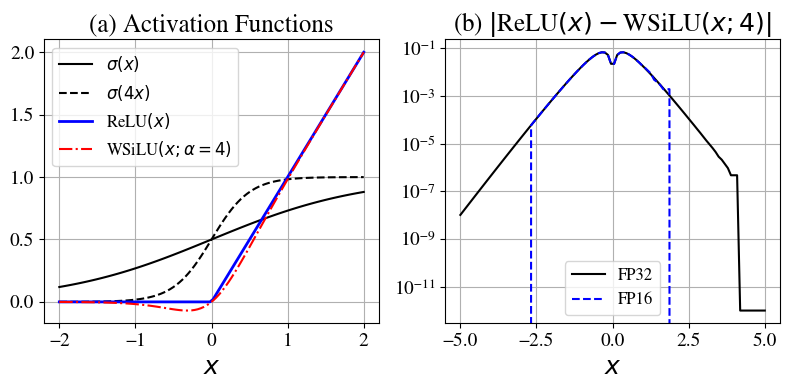

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Definições em NumPy -----
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def relu(x):
    return np.maximum(0.0, x)

def wsilu(x, alpha=4.0):
    return x * sigmoid(alpha * x)

eps = 1e-12  # evita log(0) na segunda figura

plt.figure(figsize=(8, 4))
plt.rcParams["font.family"] = "Nimbus Roman"

# (a) Curvas das ativações
plt.subplot(1, 2, 1)
x = np.linspace(-2, 2, 100, dtype=np.float32)
plt.plot(x, sigmoid(x),           label="$\\sigma(x)$",        color="black")
plt.plot(x, sigmoid(4*x),         label="$\\sigma(4x)$",       color="black", linestyle="--")
plt.plot(x, relu(x),              label="ReLU$(x)$",           linewidth=2, color="blue")
plt.plot(x, wsilu(x, alpha=4.0),  label="WSiLU$(x; \\alpha=4)$", color="red", linestyle="-.")
plt.grid(True)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=14)  # aumenta os ticks dos eixos
plt.xlabel("$x$", fontsize=18)
plt.title("(a) Activation Functions", fontsize=18)

# (b) Diferença |ReLU - WSiLU| em FP32 e FP16
plt.subplot(1, 2, 2)
x = np.linspace(-5, 5, 100, dtype=np.float32)

# FP32
diff_fp32 = np.abs(relu(x) - wsilu(x, alpha=4.0)) + eps

# FP16: faça o casting do input e dos resultados
x16 = x.astype(np.float16)
relu16 = relu(x16).astype(np.float16)
wsilu16 = wsilu(x16, alpha=4.0).astype(np.float16)
diff_fp16 = np.abs(relu16 - wsilu16).astype(np.float16) + eps

plt.plot(x, diff_fp32, label="FP32", color="black")
plt.plot(x, diff_fp16.astype(np.float32), label="FP16", linestyle="--", color="blue")

plt.yscale('log')
plt.grid(True)
plt.legend(fontsize=12, loc="lower center")
plt.xlabel("$x$", fontsize=18)
plt.title("(b) $|$ReLU$(x)-$WSiLU$(x;4)|$", fontsize=18)
plt.tick_params(axis='both', labelsize=14)  # aumenta os ticks dos eixos

plt.tight_layout()

plt.savefig("../paper_figures/activation_func_error.pdf", dpi=1200, bbox_inches="tight")   # formato PNG


plt.show()


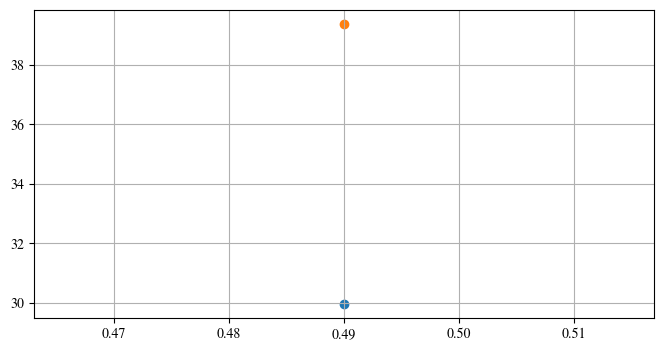

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rcParams["font.family"] = "Nimbus Roman"

POINTS = {
    "poly" : {
        "bd-rate" : 0.49,
        "30" : {
            "power" : 29.97,
            "area" : 209.81,
        },
        "15" : {
            "power" : 39.38,
            "area" : 153.12,
        },
    }
}

for label in POINTS:
    bd_rate = POINTS[label]["bd-rate"]
    power_30 = POINTS[label]["30"]["power"]
    power_15 = POINTS[label]["15"]["power"]
    plt.grid(True)
    plt.scatter(bd_rate, power_30)
    plt.scatter(bd_rate, power_15)
    